## Data Cleaning and Data Exploration

### Importing and Cleaning 

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sb

In [2]:
#Import Data

listing_file = "C:\\Users\\sofia\\Desktop\\Airbnb\\listings.csv"
listing_df = pd.read_csv(listing_file)

### Droping NAs and droping columns 

In [3]:
#Drop NAs 

listing_df = listing_df[['id', 'accommodates', 'name', 'host_id', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', \
                         'host_is_superhost', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', \
                         'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', \
                         'latitude', 'longitude', 'room_type', 'bathrooms_text', 'bedrooms', 'amenities', 'price', 'number_of_reviews']]

listing_clean = listing_df.dropna(axis= 1 , how='all')
listing_clean = listing_clean.dropna()

print(listing_df.shape)
print(listing_clean.shape)

#listing_clean.isna().sum()

(18526, 23)
(8161, 23)


### Transforming Data

In [4]:
#Transform Data

#Turn Price column into a numeric type:

for price in listing_clean:
    if listing_clean['price'].dtype == 'object':
        listing_clean['price'] = listing_clean['price'].str.replace('$', '')
        listing_clean['price'] = listing_clean['price'].str.replace(',', '')
        
listing_clean.loc[:, 'price'] = pd.to_numeric(listing_clean['price'])


#Split bathroom column into number of bathrooms and Type:

listing_clean['nr_bath'] = listing_clean['bathrooms_text'].str.split().str[0]
listing_clean['type_of_bath'] = listing_clean['bathrooms_text'].str.split().str[1]
#listing_clean = listing_clean.drop('bathrooms_text', axis = 1)

#Turning String values that appear in the number of bathrooms column into NA:

for value in listing_clean:
    if listing_clean['nr_bath'].dtype == 'object':
        listing_clean['nr_bath'] = listing_clean['nr_bath'].replace('Shared', np.nan)
        listing_clean['nr_bath'] = listing_clean['nr_bath'].replace('Private', np.nan)
        
#Removing NAs:

listing_clean = listing_clean.dropna(axis = 0, how = 'any', subset = ['type_of_bath', 'nr_bath'])

#print(listing_clean['nr_bath'].unique())
#print(listing_clean['type_of_bath'].unique())
#All good

#Turning number of baths into numeric data type:

listing_clean['nr_bath'].dtypes
listing_clean.loc[:, 'nr_bath'] = pd.to_numeric(listing_clean['nr_bath'])

C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/1945037960.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing_clean['price'] = listing_clean['price'].str.replace('$', '')


In [5]:
#Resetting Index
listing_clean.reset_index(drop=True, inplace=True)

In [6]:
#Tranforming Booleans

listing_clean['is_entire_place'] = 0

for i in range (len(listing_clean)):
    if listing_clean['room_type'][i] == 'Entire home/apt':
        listing_clean['is_entire_place'][i] = 1
          
listing_clean['is_shared_room'] = 0

for i in range (len(listing_clean)):
    if listing_clean['room_type'][i] == 'Shared room':
        listing_clean['is_shared_room'][i] = 1
        
listing_clean['host_is_superhost'] = listing_clean['host_is_superhost'].replace('f', 0)
listing_clean['host_is_superhost'] = listing_clean['host_is_superhost'].replace('t', 1)

listing_clean['host_identity_verified'] = listing_clean['host_identity_verified'].replace('f', 0)
listing_clean['host_identity_verified'] = listing_clean['host_identity_verified'].replace('t', 1)

listing_clean['host_has_profile_pic'] = listing_clean['host_has_profile_pic'].replace('f', 0)
listing_clean['host_has_profile_pic'] = listing_clean['host_has_profile_pic'].replace('t', 1)

C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/3766199410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_clean['is_entire_place'][i] = 1
C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/3766199410.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_clean['is_shared_room'][i] = 1


## Visualization 

### Removing Outliers 

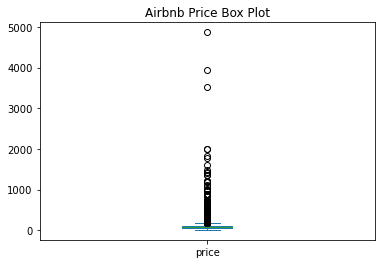

In [7]:
listing_clean[['price']].plot.box()
plt.title('Airbnb Price Box Plot')
plt.show()

In [8]:
Q1 = listing_clean['price'].quantile(0.25)
Q3 = listing_clean['price'].quantile(0.75)
IQR = Q3 - Q1

airbnb_df = listing_clean.drop(listing_clean[(listing_clean['price'] > Q3+1.5*IQR) | (listing_clean['price']< Q1-1.5*IQR) ].index )
print("Removed", listing_clean.shape[0] - airbnb_df.shape[0], "rows.")

Removed 689 rows.


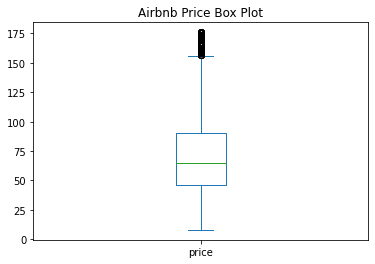

In [9]:
airbnb_df[['price']].plot.box()
plt.title('Airbnb Price Box Plot')
plt.show()

### Distributions 

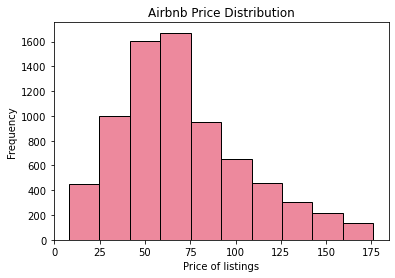

In [10]:
#Histogram - Distribution of Prices

data = airbnb_df[['price']]
sb.histplot(data, bins=10, legend = False, palette = ['crimson'])
#distplot
plt.xlabel('Price of listings')
plt.ylabel('Frequency')
plt.title('Airbnb Price Distribution')
plt.show()

## Regressors and Correlations 

In [11]:
col = airbnb_df.select_dtypes(['int', 'float']).columns
col = list(col)
col.sort()

airbnb_df.corr() > 0.5

,id,accommodates,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bedrooms,price,number_of_reviews,nr_bath,is_entire_place,is_shared_room
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
accommodates,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
host_id,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
host_is_superhost,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
host_listings_count,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
host_has_profile_pic,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
host_identity_verified,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
latitude,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
longitude,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False


In [12]:
corr = airbnb_df.corr()
corr[(corr > 0.2) | (corr < -0.2)]['price']

id                             NaN
accommodates              0.549572
host_id                        NaN
host_is_superhost              NaN
host_listings_count            NaN
host_has_profile_pic           NaN
host_identity_verified         NaN
latitude                       NaN
longitude                      NaN
bedrooms                  0.376681
price                     1.000000
number_of_reviews              NaN
nr_bath                        NaN
is_entire_place           0.448933
is_shared_room                 NaN
Name: price, dtype: float64

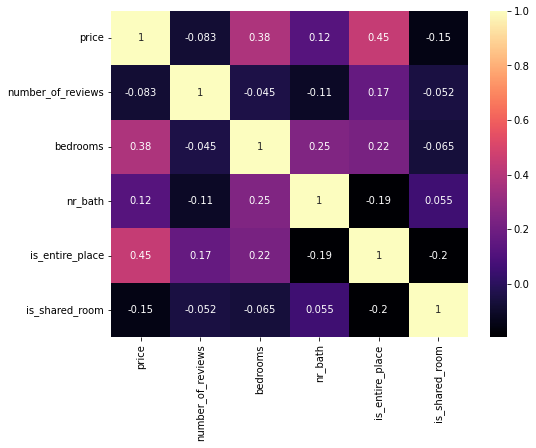

In [13]:
regressors = airbnb_df[['price', 'number_of_reviews', 'host_verifications', 'bedrooms', 'nr_bath', \
                       'is_entire_place', 'is_shared_room']]
plt.subplots(figsize=(8,6))
sb.heatmap(regressors.corr(), annot = True, cmap = 'magma')
plt.show()

# Amenities Score

In [14]:
#Turning amenities column type from string to list

amenities=airbnb_df['amenities']
amenities.reset_index(drop=True, inplace=True)
airbnb_df.reset_index(drop=True, inplace=True)

count=0
for i in amenities:
    amenities[count] = i.strip('][').split(', ')
    count+=1

C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/2310688818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities[count] = i.strip('][').split(', ')


In [15]:
score=0
score_list=list()

for i in amenities:
    score=len(i)
    if '"Air conditioning"' in i:
        score+=10
        score-=1
    if '"Heating"' in i:
        score+=10
        score-=1
    if '"Refrigerator"' in i:
        score+=10
        score-=1
    if '"Washer"' in i:
        score+=9
        score-=1
    if '"Essentials"' in i:
        score+=8
        score-=1
    if '"Cooking basics"' in i:
        score+=7
        score-=1
    if '"Dishwasher"' in i:
        score+=5
        score-=1
    if '"Wifi"' in i:
        score+=6
        score-=1
    if '"Hair dryer"' in i:
        score+=5
        score-=1
    if '"TV"' in i:
        score+=2
        score-=1
    if '"Microwave"' in i:
        score+=3
        score-=1
    score_list.append(score)

In [16]:
airbnb_df['amenities_score'] = score_list

### Removing Outliers 

<AxesSubplot:>

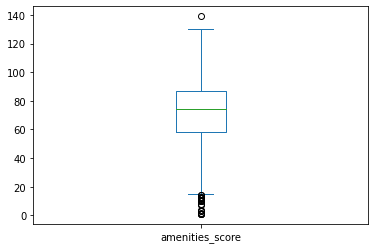

In [17]:
#Box Plot
airbnb_df[['amenities_score']].plot.box()

In [18]:
Q1 = airbnb_df['amenities_score'].quantile(0.25)
Q3 = airbnb_df['amenities_score'].quantile(0.75)
IQR = Q3 - Q1
airbnb_df=airbnb_df.drop(airbnb_df[ (airbnb_df['amenities_score'] > Q3+1.5*IQR) | (airbnb_df['amenities_score']< Q1-1.5*IQR) ].index )

<AxesSubplot:>

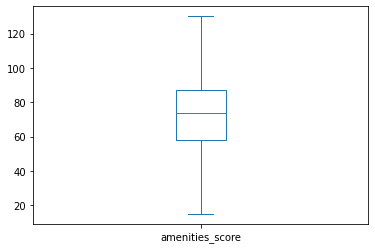

In [19]:
#New Box Plot
airbnb_df[['amenities_score']].plot.box()

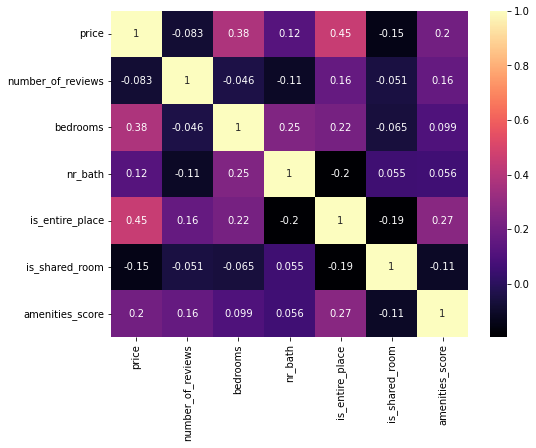

In [20]:
regressors = airbnb_df[['price', 'number_of_reviews', 'host_verifications', 'bedrooms', 'nr_bath', \
                       'is_entire_place', 'is_shared_room', 'amenities_score']]
plt.subplots(figsize=(8,6))
sb.heatmap(regressors.corr(), annot = True, cmap = 'magma')
plt.show()

# Host Features 

In [21]:
host_df = airbnb_df[['host_id', 'host_since', 'host_about', \
                     'host_response_time', 'host_response_rate', \
                     'host_is_superhost', 'host_listings_count', 'host_verifications', \
                     'host_has_profile_pic', 'host_identity_verified']]

In [22]:
verifications = host_df['host_verifications']
verifications.reset_index(drop=True, inplace=True)
airbnb_df.reset_index(drop=True, inplace=True)

count2 = 0
for i in verifications:
    verifications[count2] = i.strip('][').split(', ')
    count2 += 1

C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/1232671156.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verifications[count2] = i.strip('][').split(', ')


In [23]:
host_score = 0 
host_score_list = list()

for i in verifications:
    host_score = len(i)
    if '"phone"' in i:
        host_score += 10
        host_score -= 1
    if '"email"' in i:
        host_score += 5
        host_score -= 1
    host_score_list.append(host_score)

In [24]:
host_df.reset_index(drop=True, inplace=True)

In [25]:
for i in range (len(host_df)):
    if host_df['host_response_time'][i] == 'within an hour':
        host_score_list[i] += 10
    if host_df['host_response_time'][i] == 'within a few hours':
        host_score_list[i] += 5
    if host_df['host_response_time'][i] == 'within a day':
        host_score_list[i] += 3    

In [26]:
host_df['Len_info_about'] = host_df['host_about'].astype(str).map(len)

for i in range (len(host_df)):
    if 300 <= host_df['Len_info_about'][i] <= 500:
        host_score_list[i] += 5
    if host_df['host_is_superhost'][i] == 1:
        host_score_list[i] += 5
    if host_df['host_has_profile_pic'][i] == 1 and host_df['host_identity_verified'][i] == 1:
        host_score_list[i] += 5

C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/1892833973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_df['Len_info_about'] = host_df['host_about'].astype(str).map(len)


In [27]:
host_df['host_since'] = pd.to_datetime(host_df['host_since'], format = '%Y-%m-%d') 

C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/1324405203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_df['host_since'] = pd.to_datetime(host_df['host_since'], format = '%Y-%m-%d')


In [28]:
for i in range (len(host_df)):
    if host_df['host_since'][i] <= pd.Timestamp(2018, 1, 1):
        host_score_list[i] += 5

In [29]:
for i in range (len(host_df)):
    if host_df['host_listings_count'][i] >= 3.0:
        host_score_list[i] += 3

In [30]:
host_df.reset_index(drop=True, inplace=True)
airbnb_df.reset_index(drop=True, inplace=True)

In [31]:
airbnb_df['host_score'] = host_score_list
#len(host_score_list)

<AxesSubplot:>

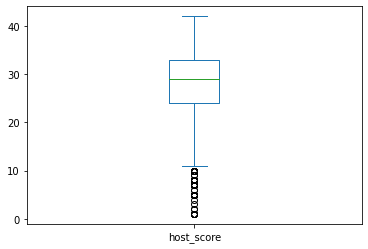

In [32]:
airbnb_df[['host_score']].plot.box()

In [33]:
#from datetime import timedelta
host_df['years_of_experience'] = pd.datetime.now().year - host_df['host_since'].dt.year

C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/3077251174.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  host_df['years_of_experience'] = pd.datetime.now().year - host_df['host_since'].dt.year
C:\Users\sofia\AppData\Local\Temp/ipykernel_5760/3077251174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_df['years_of_experience'] = pd.datetime.now().year - host_df['host_since'].dt.year


In [34]:
airbnb_df['host_experience'] = host_df['years_of_experience']

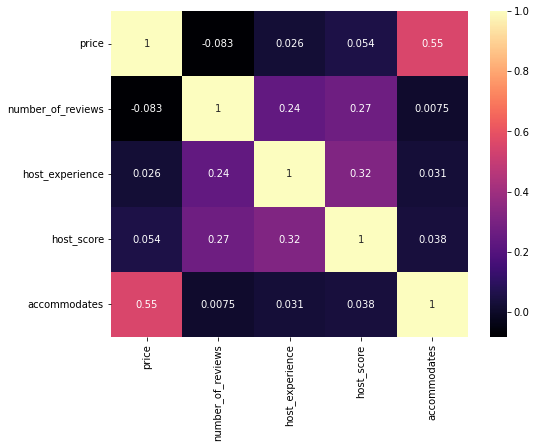

In [39]:
regressors = airbnb_df[['price', 'number_of_reviews', 'host_verifications', \
                       'host_experience', 'host_score', 'accommodates']]
plt.subplots(figsize=(8,6))
sb.heatmap(regressors.corr(), annot = True, cmap = 'magma')
plt.show()

In [36]:
airbnb_df[['host_experience', 'host_score']]

,host_experience,host_score
0,13,28
1,12,31
2,12,31
3,12,34
4,12,24
...,...,...
7415,6,31
7416,6,28
7417,4,25
7418,4,16


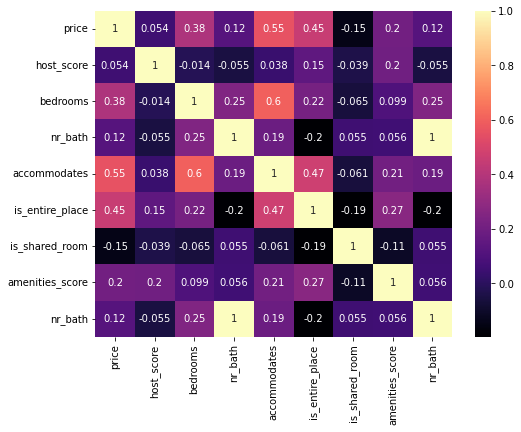

In [41]:
regressors = airbnb_df[['price','host_score', 'bedrooms', 'nr_bath', 'accommodates', \
                       'is_entire_place', 'is_shared_room', 'amenities_score', 'nr_bath']]
plt.subplots(figsize=(8,6))
sb.heatmap(regressors.corr(), annot = True, cmap = 'magma')
plt.show()

In [37]:
airbnb_df.columns

Index(['id', 'accommodates', 'name', 'host_id', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'bathrooms_text', 'bedrooms', 'amenities', 'price', 'number_of_reviews',
       'nr_bath', 'type_of_bath', 'is_entire_place', 'is_shared_room',
       'amenities_score', 'host_score', 'host_experience'],
      dtype='object')

In [38]:
listing_df.columns

Index(['id', 'accommodates', 'name', 'host_id', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'bathrooms_text', 'bedrooms', 'amenities', 'price',
       'number_of_reviews'],
      dtype='object')